## Clustering

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# os.chdir('C:/Users/zzlen/OneDrive - Seattle University/MSBA/5. Fall 2022/BUAN 5510/Capstone Project/Yelp Review/JSON')

In [2]:
# load the dataset

final_business = pd.read_csv('final_business_sentiment.csv')

In [3]:
# Split X and y dataset

cols_to_drop = ['business_id', 'business_name', 'city', 'state', 'postal_code', 'categories']

# X = final_business.drop(cols_to_drop, axis=1)
# y = final_business['stars']

df = final_business.drop(cols_to_drop, axis=1)

In [4]:
# Normalize the data

scaler = StandardScaler()
dfn = scaler.fit_transform(df)

In [5]:
# Finding K

# Initialize the list for inertia values - sum of squared distances
inertia_list = [] 

# Calculate the inertia for the number of clusters.

for i in range(2,6):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(dfn)
    inertia_list.append(km.inertia_)

In [6]:
# Check the inertia values.
for i in range(len(inertia_list)):
    print('{0}: {1:.2f}'.format(i+2, inertia_list[i]))   

2: 282522.54
3: 268602.34
4: 258931.83
5: 251602.00


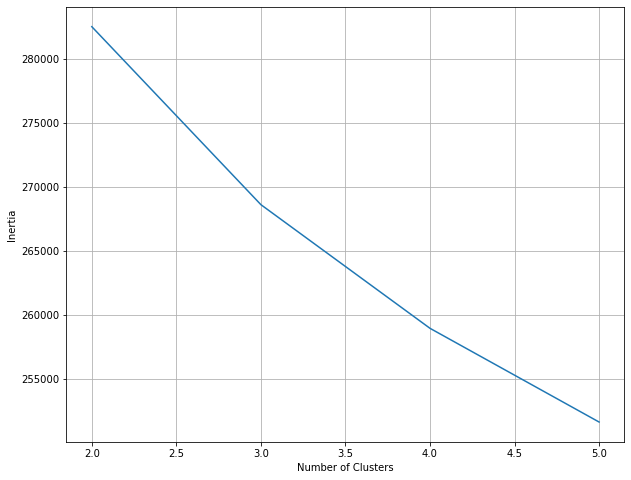

In [7]:
# Draw the plot to find the elbow

from matplotlib.pyplot import figure
figure(figsize=(10, 8))
  
plt.plot(range(2,6), inertia_list)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Selected k = 3

km = KMeans(n_clusters=3, random_state=1234)

# Build a model.
km.fit(dfn)

KMeans(n_clusters=3, random_state=1234)

In [9]:
# Show the cluster numbers and assign them to a variable.
labels = km.labels_
labels

array([2, 1, 1, ..., 1, 1, 0])

In [10]:
km.inertia_

268602.33562106965

In [11]:
km.n_clusters

3

In [12]:
# Add the cluster numbers to the original data.
X_clusters = np.column_stack((labels,df))

In [13]:
df_1 = pd.DataFrame(data=df,columns=df.columns)
# Add the cluster numbers to df
df_1['Cluster_No'] = km.labels_

In [14]:
df_1.head()

,stars,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'formal',WiFi_'free',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_3,RestaurantsPriceRange_4,pos,neg,neu,Cluster_No
0,4.0,245,7625,162885,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.394244,0.040224,0.565528,2
1,4.5,205,18239,128426,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.389721,0.033341,0.576904,1
2,3.5,109,5665,135760,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.315895,0.060658,0.623412,1
3,4.5,95,9689,109557,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.393788,0.042313,0.563909,1
4,4.0,129,8805,114601,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0.379112,0.039575,0.581343,2


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6265 non-null   float64
 1   review_count                6265 non-null   int64  
 2   total_hh                    6265 non-null   int64  
 3   avg_income                  6265 non-null   int64  
 4   RestaurantsDelivery         6265 non-null   int64  
 5   OutdoorSeating              6265 non-null   int64  
 6   BusinessAcceptsCreditCards  6265 non-null   int64  
 7   BikeParking                 6265 non-null   int64  
 8   RestaurantsTakeOut          6265 non-null   int64  
 9   Caters                      6265 non-null   int64  
 10  RestaurantsReservations     6265 non-null   int64  
 11  RestaurantsGoodForGroups    6265 non-null   int64  
 12  HasTV                       6265 non-null   int64  
 13  GoodForKids                 6265 

In [16]:
# Create a dataframe for each cluster.
Cluster_0 = df_1.loc[df_1.Cluster_No==0]
Cluster_1 = df_1.loc[df_1.Cluster_No==1]
Cluster_2 = df_1.loc[df_1.Cluster_No==2]

In [17]:
# Produce some descriptive information.
df_1['Cluster_No'].value_counts()

1    3899
0    1656
2     710
Name: Cluster_No, dtype: int64

In [18]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,6265.0,3.653711,0.670127,1.000000,3.500000,4.000000,4.000000,5.000000
review_count,6265.0,183.769832,264.926329,5.000000,55.000000,109.000000,213.000000,5721.000000
total_hh,6265.0,11905.193775,5356.357483,58.000000,7926.000000,10981.000000,16269.000000,25565.000000
avg_income,6265.0,103543.619633,39479.396736,35854.000000,73735.000000,98255.000000,133441.000000,409434.000000
RestaurantsDelivery,6265.0,0.693216,0.461196,0.000000,0.000000,1.000000,1.000000,1.000000
OutdoorSeating,6265.0,0.477255,0.499522,0.000000,0.000000,0.000000,1.000000,1.000000
BusinessAcceptsCreditCards,6265.0,0.959617,0.196872,0.000000,1.000000,1.000000,1.000000,1.000000
BikeParking,6265.0,0.766480,0.423104,0.000000,1.000000,1.000000,1.000000,1.000000
RestaurantsTakeOut,6265.0,0.957382,0.202010,0.000000,1.000000,1.000000,1.000000,1.000000
Caters,6265.0,0.574940,0.494392,0.000000,0.000000,1.000000,1.000000,1.000000


## Modeling

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

import time

## Cluster 0

In [20]:
# Split X and y dataset

X0 = Cluster_0.drop('stars', axis=1)
y0 = Cluster_0['stars']

In [21]:
y0.value_counts()

3.0    549
2.5    403
3.5    347
2.0    171
4.0    112
1.5     57
4.5     12
1.0      4
5.0      1
Name: stars, dtype: int64

In [22]:
## Split training and testing dataset

from sklearn.model_selection import train_test_split

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, stratify=y0, random_state=1234)

X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [23]:
Cluster_0_dropped = Cluster_0[Cluster_0['stars'] != 5.0]

In [24]:
# Split X and y dataset

X0_dropped = Cluster_0_dropped.drop('stars', axis=1)
y0_dropped = Cluster_0_dropped['stars']
y0_dropped.value_counts()

3.0    549
2.5    403
3.5    347
2.0    171
4.0    112
1.5     57
4.5     12
1.0      4
Name: stars, dtype: int64

In [25]:
## Split training and testing dataset

from sklearn.model_selection import train_test_split

X0_train, X0_test, y0_train, y0_test = train_test_split(X0_dropped, y0_dropped, test_size=0.2, stratify=y0_dropped, random_state=1234)

X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

((1324, 48), (331, 48), (1324,), (331,))

#### Cluster 0_Gradient Boosting (Original)

In [26]:
t_start = time.time()

gbr0 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0)
gbr0.fit(X0_train, y0_train)
y0_predGB = gbr0.predict(X0_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 0.45457887649536133 seconds


In [27]:
gbr0_mse = metrics.mean_squared_error(y0_test,y0_predGB)
gbr0_rmse = np.sqrt(gbr0_mse)
gbr0_rsquared = gbr0.score(X0_test, y0_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr0_mse,'\n','rmse:', gbr0_rmse)
print (' R^2: ', gbr0_rsquared)


 **Evaluation of Errors**
 mse:  0.1062528731079359 
 rmse: 0.3259645273767314
 R^2:  0.7176460493686831


## Cluster 1

In [28]:
# Split X and y dataset

X1 = Cluster_1.drop('stars', axis=1)
y1 = Cluster_1['stars']
y1.value_counts()

4.0    1690
3.5    1055
4.5     888
3.0     206
5.0      54
2.5       6
Name: stars, dtype: int64

In [29]:
## Split training and testing dataset

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=1234)

X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((3119, 48), (780, 48), (3119,), (780,))

#### Cluster 1_Gradient Boosting (Original)

In [30]:
t_start = time.time()

gbr1 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0)
gbr1.fit(X1_train, y1_train)
y1_predGB = gbr1.predict(X1_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 1.1882786750793457 seconds


In [31]:
gbr1_mse = metrics.mean_squared_error(y1_test,y1_predGB)
gbr1_rmse = np.sqrt(gbr1_mse)
gbr1_rsquared = gbr1.score(X1_test, y1_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr1_mse,'\n','rmse:', gbr1_rmse)
print (' R^2: ', gbr1_rsquared)


 **Evaluation of Errors**
 mse:  0.06035066704781164 
 rmse: 0.24566372757859806
 R^2:  0.6831050883616538


## Cluster 2

In [32]:
# Split X and y dataset

X2 = Cluster_2.drop('stars', axis=1)
y2 = Cluster_2['stars']
y2.value_counts()

4.0    318
3.5    187
4.5    130
3.0     51
2.5     20
5.0      3
2.0      1
Name: stars, dtype: int64

In [33]:
## Split training and testing dataset

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=1234)

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [34]:
Cluster_2_dropped = Cluster_2[Cluster_2['stars'] != 2.0]

In [35]:
# Split X and y dataset

X2_dropped = Cluster_2_dropped.drop('stars', axis=1)
y2_dropped = Cluster_2_dropped['stars']
y2_dropped.value_counts()

4.0    318
3.5    187
4.5    130
3.0     51
2.5     20
5.0      3
Name: stars, dtype: int64

In [36]:
## Split training and testing dataset

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_dropped, y2_dropped, test_size=0.2, stratify=y2_dropped, random_state=1234)

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((567, 48), (142, 48), (567,), (142,))

#### Cluster 2_Gradient Boosting (Original)

In [37]:
t_start = time.time()

gbr2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0)
gbr2.fit(X2_train, y2_train)
y2_predGB = gbr2.predict(X2_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 0.2124185562133789 seconds


In [38]:
gbr2_mse = metrics.mean_squared_error(y2_test,y2_predGB)
gbr2_rmse = np.sqrt(gbr2_mse)
gbr2_rsquared = gbr2.score(X2_test, y2_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr2_mse,'\n','rmse:', gbr2_rmse)
print (' R^2: ', gbr2_rsquared)


 **Evaluation of Errors**
 mse:  0.04972417254779582 
 rmse: 0.22298917585343872
 R^2:  0.7846683027642942
